In [1]:
libname stat2131 "";
run;

SAS Connection established. Subprocess id is 2511



In [2]:
data pg_steam;
  set stat2131.pg_steam;
run;

In [3]:
proc print data=pg_steam (obs=10);
run;

Obs,seq,month,steam,fat,glycerin,wind,cday,opday,frezday,temp,starts
1,1,1,10.98,5.20,0.61,7.4,31,20,22,35.3,4
2,2,2,11.13,5.12,0.64,8.0,29,20,25,29.7,5
3,3,3,12.51,6.19,0.78,7.4,31,23,17,30.8,4
4,4,4,8.40,3.89,0.49,7.5,30,20,22,58.8,4
5,5,5,9.27,6.28,0.84,5.5,31,21,0,61.4,5
6,6,6,8.73,5.76,0.74,8.9,30,22,0,71.3,4
7,7,7,6.36,3.45,0.42,4.1,31,11,0,74.4,2
8,8,8,8.50,6.57,0.87,4.1,31,23,0,76.7,5
9,9,9,7.82,5.69,0.75,4.1,30,21,0,70.7,4
10,10,10,9.14,6.14,0.76,4.5,31,20,0,57.5,5



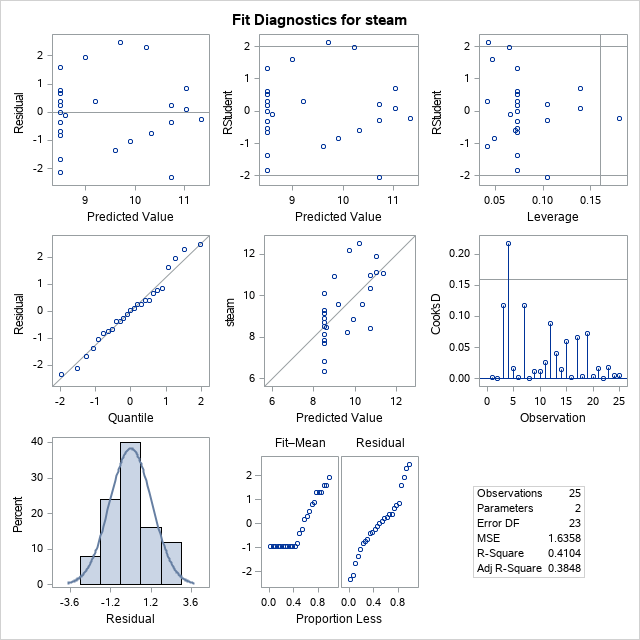
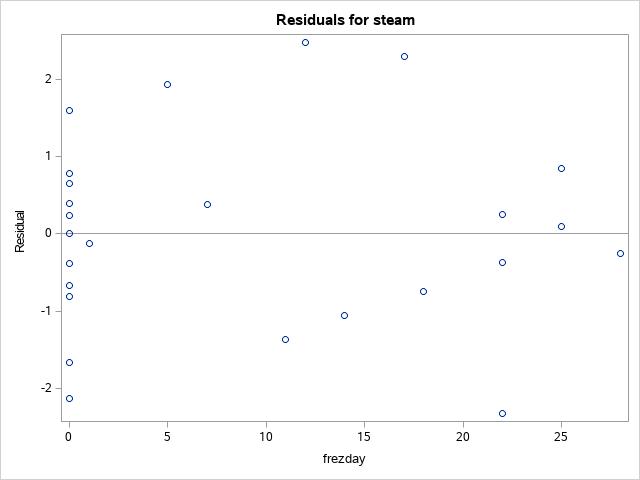
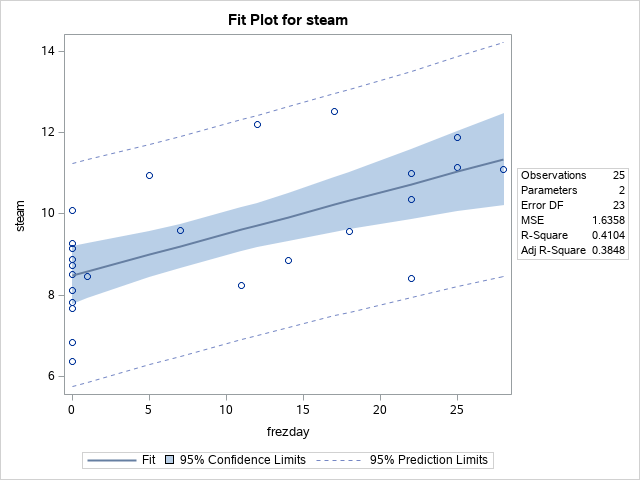
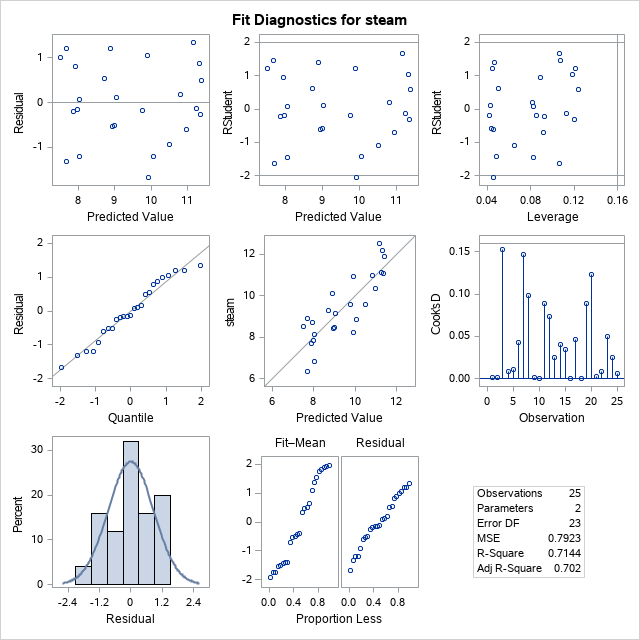
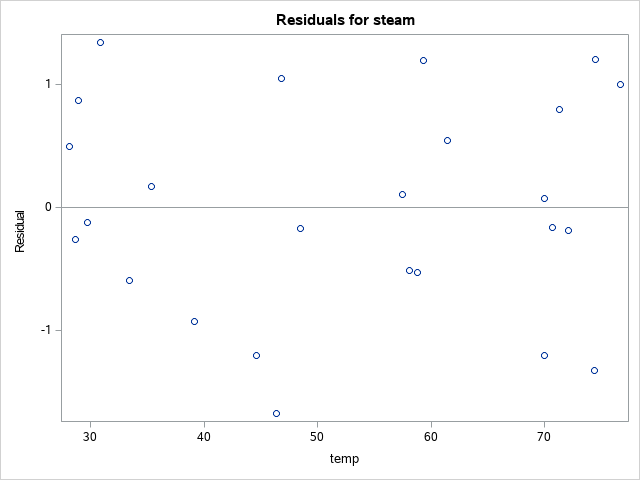
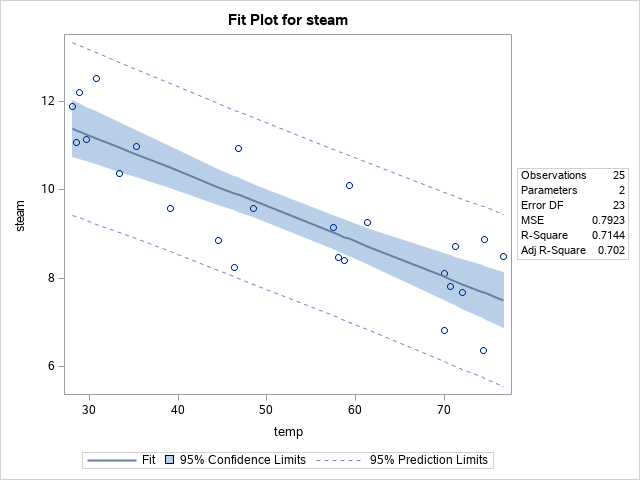
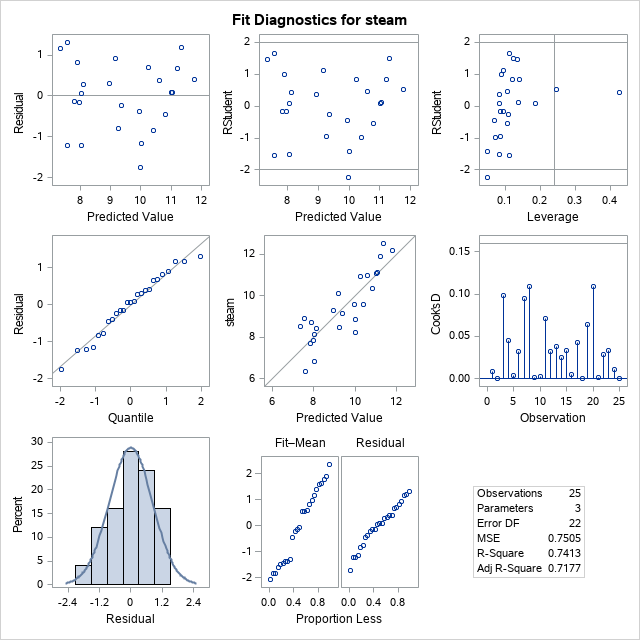
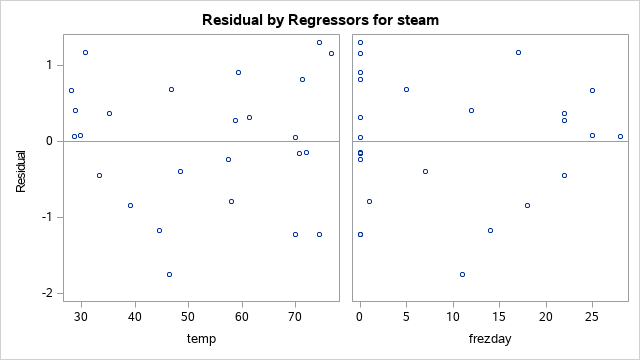

In [6]:
proc reg data=pg_steam;
  model1: model steam = frezday;
  model2: model steam = temp;
  model3: model steam = temp frezday;
run;

In [7]:
proc corr data=pg_steam spearman;
   var frezday temp;
run;

In [8]:
data newPred;
input steam temp frezday;
datalines;
. 35 0
. 35 7
. 35 14
. 35 28
;
run;

In [9]:
data extented ;
 set pg_steam;
 keep steam temp frezday;
run;

In [11]:
data extented;
  set pg_steam newPred;
run;

In [12]:
proc print data=extented;
run;

Obs,seq,month,steam,fat,glycerin,wind,cday,opday,frezday,temp,starts
1,1,1,10.98,5.20,0.61,7.4,31,20,22,35.3,4
2,2,2,11.13,5.12,0.64,8.0,29,20,25,29.7,5
3,3,3,12.51,6.19,0.78,7.4,31,23,17,30.8,4
4,4,4,8.40,3.89,0.49,7.5,30,20,22,58.8,4
5,5,5,9.27,6.28,0.84,5.5,31,21,0,61.4,5
6,6,6,8.73,5.76,0.74,8.9,30,22,0,71.3,4
7,7,7,6.36,3.45,0.42,4.1,31,11,0,74.4,2
8,8,8,8.50,6.57,0.87,4.1,31,23,0,76.7,5
9,9,9,7.82,5.69,0.75,4.1,30,21,0,70.7,4
10,10,10,9.14,6.14,0.76,4.5,31,20,0,57.5,5



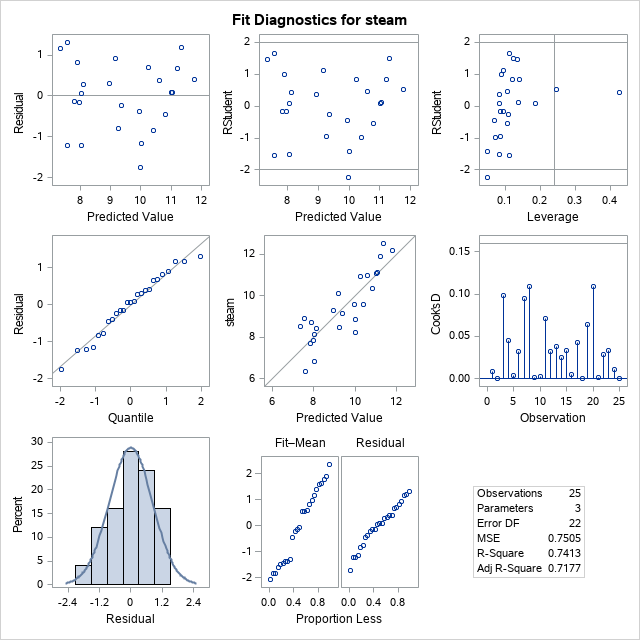
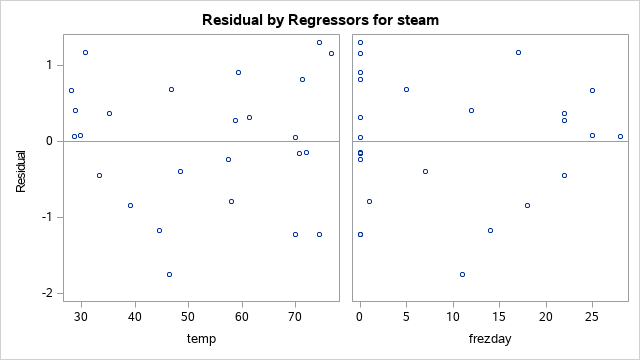

In [27]:
proc reg data=extented;
  model steam  = temp frezday;
  output out=extentedfit p=steamhat stdi = sp stdp = p; *stdi is prediction sd;
run;

In [28]:
proc print data=extentedfit;
run;

Obs,seq,month,steam,fat,glycerin,wind,cday,opday,frezday,temp,starts,steamhat,p,sp
1,1,1,10.98,5.20,0.61,7.4,31,20,22,35.3,4,10.6028,0.28169,0.91096
2,2,2,11.13,5.12,0.64,8.0,29,20,25,29.7,5,11.0427,0.32286,0.92452
3,3,3,12.51,6.19,0.78,7.4,31,23,17,30.8,4,11.3306,0.30333,0.91788
4,4,4,8.40,3.89,0.49,7.5,30,20,22,58.8,4,8.1206,0.56618,1.03492
5,5,5,9.27,6.28,0.84,5.5,31,21,0,61.4,5,8.9572,0.24997,0.90166
6,6,6,8.73,5.76,0.74,8.9,30,22,0,71.3,4,7.9115,0.25860,0.90409
7,7,7,6.36,3.45,0.42,4.1,31,11,0,74.4,2,7.5840,0.29022,0.91364
8,8,8,8.50,6.57,0.87,4.1,31,23,0,76.7,5,7.3411,0.31943,0.92333
9,9,9,7.82,5.69,0.75,4.1,30,21,0,70.7,4,7.9748,0.25376,0.90272
10,10,10,9.14,6.14,0.76,4.5,31,20,0,57.5,5,9.3691,0.28653,0.91247


In [29]:
*contineous inference;
data intervals;
 set extentedfit;
 W = sqrt( 3*finv(.95,3,22));
 She = sqrt( 4*finv(.95,4,22));
 bonlev=1 - (.05/8);
 Bon = tinv(bonlev,22);
 mean_bon_L = teamhat - Bon*s;
 mean_bon_H = teamhat + Bon*s;
 mean_WH_L = teamhat - W*s;
 mean_WH_H = teamhat + W*s;
 pred_Sch_L = SteamHat - She*sp;
 pred_Sch_H = SteamHat + She*sp;
 pred_bon_L = SteamHat - Bon*sp;
 pred_bon_H = SteamHat + Bon*sp;
 if steam ne . then delete;
run;

In [30]:
proc print data=intervals;
 var frezday mean_bon_L mean_bon_H 
 mean_WH_L mean_WH_H pred_Sch_L 
pred_Sch_H pred_bon_L pred_bon_H;
run;

Obs,frezday,mean_bon_L,mean_bon_H,mean_WH_L,mean_WH_H,pred_Sch_L,pred_Sch_H,pred_bon_L,pred_bon_H
1,0,.,.,.,.,8.09741,15.3940,8.78919,14.7022
2,7,.,.,.,.,8.11704,14.6672,8.73806,14.0462
3,14,.,.,.,.,7.97636,14.1007,8.55701,13.5201
4,28,.,.,.,.,7.10916,13.5536,7.72015,12.9426


___

/*******************************************************************************
The SENIC Study - Appendix C

From 1975-1976, 113 hospitals were surveyed  to determine whether infection surveillance 
and control programs have reduced the rates of hospital-acquired infection.

Our goal is to determine how the expected risk of infection changes with:
  - average patient age (age)
  - average length of stay (stay)
  - percent of 35 potential facilities and services provided by the hospital (facilities).
********************************************************************************************/

In [31]:
data senic;
input id stay age risk culturing xray beds medschool region census nurses facilities;
datalines;
  1   7.13  55.7  4.1   9.0   39.6  279  2  4  207  241  60.0
  2   8.82  58.2  1.6   3.8   51.7   80  2  2   51   52  40.0
  3   8.34  56.9  2.7   8.1   74.0  107  2  3   82   54  20.0
  4   8.95  53.7  5.6  18.9  122.8  147  2  4   53  148  40.0
  5  11.20  56.5  5.7  34.5   88.9  180  2  1  134  151  40.0
  6   9.76  50.9  5.1  21.9   97.0  150  2  2  147  106  40.0
  7   9.68  57.8  4.6  16.7   79.0  186  2  3  151  129  40.0
  8  11.18  45.7  5.4  60.5   85.8  640  1  2  399  360  60.0
  9   8.67  48.2  4.3  24.4   90.8  182  2  3  130  118  40.0
 10   8.84  56.3  6.3  29.6   82.6   85  2  1   59   66  40.0
 11  11.07  53.2  4.9  28.5  122.0  768  1  1  591  656  80.0
 12   8.30  57.2  4.3   6.8   83.8  167  2  3  105   59  40.0
 13  12.78  56.8  7.7  46.0  116.9  322  1  1  252  349  57.1
 14   7.58  56.7  3.7  20.8   88.0   97  2  2   59   79  37.1
 15   9.00  56.3  4.2  14.6   76.4   72  2  3   61   38  17.1
 16  11.08  50.2  5.5  18.6   63.6  387  2  3  326  405  57.1
 17   8.28  48.1  4.5  26.0  101.8  108  2  4   84   73  37.1
 18  11.62  53.9  6.4  25.5   99.2  133  2  1  113  101  37.1
 19   9.06  52.8  4.2   6.9   75.9  134  2  2  103  125  37.1
 20   9.35  53.8  4.1  15.9   80.9  833  2  3  547  519  77.1
 21   7.53  42.0  4.2  23.1   98.9   95  2  4   47   49  17.1
 22  10.24  49.0  4.8  36.3  112.6  195  2  2  163  170  37.1
 23   9.78  52.3  5.0  17.6   95.9  270  1  1  240  198  57.1
 24   9.84  62.2  4.8  12.0   82.3  600  2  3  468  497  57.1
 25   9.20  52.2  4.0  17.5   71.1  298  1  4  244  236  57.1
 26   8.28  49.5  3.9  12.0  113.1  546  1  2  413  436  57.1
 27   9.31  47.2  4.5  30.2  101.3  170  2  1  124  173  37.1
 28   8.19  52.1  3.2  10.8   59.2  176  2  1  156   88  37.1
 29  11.65  54.5  4.4  18.6   96.1  248  2  1  217  189  37.1
 30   9.89  50.5  4.9  17.7  103.6  167  2  2  113  106  37.1
 31  11.03  49.9  5.0  19.7  102.1  318  2  1  270  335  57.1
 32   9.84  53.0  5.2  17.7   72.6  210  2  2  200  239  54.3
 33  11.77  54.1  5.3  17.3   56.0  196  2  1  164  165  34.3
 34  13.59  54.0  6.1  24.2  111.7  312  2  1  258  169  54.3
 35   9.74  54.4  6.3  11.4   76.1  221  2  2  170  172  54.3
 36  10.33  55.8  5.0  21.2  104.3  266  2  1  181  149  54.3
 37   9.97  58.2  2.8  16.5   76.5   90  2  2   69   42  34.3
 38   7.84  49.1  4.6   7.1   87.9   60  2  3   50   45  34.3
 39  10.47  53.2  4.1   5.7   69.1  196  2  2  168  153  54.3
 40   8.16  60.9  1.3   1.9   58.0   73  2  3   49   21  14.3
 41   8.48  51.1  3.7  12.1   92.8  166  2  3  145  118  34.3
 42  10.72  53.8  4.7  23.2   94.1  113  2  3   90  107  34.3
 43  11.20  45.0  3.0   7.0   78.9  130  2  3   95   56  34.3
 44  10.12  51.7  5.6  14.9   79.1  362  1  3  313  264  54.3
 45   8.37  50.7  5.5  15.1   84.8  115  2  2   96   88  34.3
 46  10.16  54.2  4.6   8.4   51.5  831  1  4  581  629  74.3
 47  19.56  59.9  6.5  17.2  113.7  306  2  1  273  172  51.4
 48  10.90  57.2  5.5  10.6   71.9  593  2  2  446  211  51.4
 49   7.67  51.7  1.8   2.5   40.4  106  2  3   93   35  11.4
 50   8.88  51.5  4.2  10.1   86.9  305  2  3  238  197  51.4
 51  11.48  57.6  5.6  20.3   82.0  252  2  1  207  251  51.4
 52   9.23  51.6  4.3  11.6   42.6  620  2  2  413  420  71.4
 53  11.41  61.1  7.6  16.6   97.9  535  2  3  330  273  51.4
 54  12.07  43.7  7.8  52.4  105.3  157  2  2  115   76  31.4
 55   8.63  54.0  3.1   8.4   56.2   76  2  1   39   44  31.4
 56  11.15  56.5  3.9   7.7   73.9  281  2  1  217  199  51.4
 57   7.14  59.0  3.7   2.6   75.8   70  2  4   37   35  31.4
 58   7.65  47.1  4.3  16.4   65.7  318  2  4  265  314  51.4
 59  10.73  50.6  3.9  19.3  101.0  445  1  2  374  345  51.4
 60  11.46  56.9  4.5  15.6   97.7  191  2  3  153  132  31.4
 61  10.42  58.0  3.4   8.0   59.0  119  2  1   67   64  31.4
 62  11.18  51.0  5.7  18.8   55.9  595  1  2  546  392  68.6
 63   7.93  64.1  5.4   7.5   98.1   68  2  4   42   49  28.6
 64   9.66  52.1  4.4   9.9   98.3   83  2  2   66   95  28.6
 65   7.78  45.5  5.0  20.9   71.6  489  2  3  391  329  48.6
 66   9.42  50.6  4.3  24.8   62.8  508  2  1  421  528  48.6
 67  10.02  49.5  4.4   8.3   93.0  265  2  2  191  202  48.6
 68   8.58  55.0  3.7   7.4   95.9  304  2  3  248  218  48.6
 69   9.61  52.4  4.5   6.9   87.2  487  2  3  404  220  48.6
 70   8.03  54.2  3.5  24.3   87.3   97  2  1   65   55  28.6
 71   7.39  51.0  4.2  14.6   88.4   72  2  2   38   67  28.6
 72   7.08  52.0  2.0  12.3   56.4   87  2  3   52   57  28.6
 73   9.53  51.5  5.2  15.0   65.7  298  2  3  241  193  48.6
 74  10.05  52.0  4.5  36.7   87.5  184  1  1  144  151  68.6
 75   8.45  38.8  3.4  12.9   85.0  235  2  2  143  124  48.6
 76   6.70  48.6  4.5  13.0   80.8   76  2  4   51   79  28.6
 77   8.90  49.7  2.9  12.7   86.9   52  2  1   37   35  28.6
 78  10.23  53.2  4.9   9.9   77.9  752  1  2  595  446  68.6
 79   8.88  55.8  4.4  14.1   76.8  237  2  2  165  182  48.6
 80  10.30  59.6  5.1  27.8   88.9  175  2  2  113   73  45.7
 81  10.79  44.2  2.9   2.6   56.6  461  1  2  320  196  65.7
 82   7.94  49.5  3.5   6.2   92.3  195  2  2  139  116  45.7
 83   7.63  52.1  5.5  11.6   61.1  197  2  4  109  110  45.7
 84   8.77  54.5  4.7   5.2   47.0  143  2  4   85   87  25.7
 85   8.09  56.9  1.7   7.6   56.9   92  2  3   61   61  45.7
 86   9.05  51.2  4.1  20.5   79.8  195  2  3  127  112  45.7
 87   7.91  52.8  2.9  11.9   79.5  477  2  3  349  188  65.7
 88  10.39  54.6  4.3  14.0   88.3  353  2  2  223  200  65.7
 89   9.36  54.1  4.8  18.3   90.6  165  2  1  127  158  45.7
 90  11.41  50.4  5.8  23.8   73.0  424  1  3  359  335  45.7
 91   8.86  51.3  2.9   9.5   87.5  100  2  3   65   53  25.7
 92   8.93  56.0  2.0   6.2   72.5   95  2  3   59   56  25.7
 93   8.92  53.9  1.3   2.2   79.5   56  2  2   40   14   5.7
 94   8.15  54.9  5.3  12.3   79.8   99  2  4   55   71  25.7
 95   9.77  50.2  5.3  15.7   89.7  154  2  2  123  148  25.7
 96   8.54  56.1  2.5  27.0   82.5   98  2  1   57   75  45.7
 97   8.66  52.8  3.8   6.8   69.5  246  2  3  178  177  45.7
 98  12.01  52.8  4.8  10.8   96.9  298  2  1  237  115  45.7
 99   7.95  51.8  2.3   4.6   54.9  163  2  3  128   93  42.9
100  10.15  51.9  6.2  16.4   59.2  568  1  3  452  371  62.9
101   9.76  53.2  2.6   6.9   80.1   64  2  4   47   55  22.9
102   9.89  45.2  4.3  11.8  108.7  190  2  1  141  112  42.9
103   7.14  57.6  2.7  13.1   92.6   92  2  4   40   50  22.9
104  13.95  65.9  6.6  15.6  133.5  356  2  1  308  182  62.9
105   9.44  52.5  4.5  10.9   58.5  297  2  3  230  263  42.9
106  10.80  63.9  2.9   1.6   57.4  130  2  3   69   62  22.9
107   7.14  51.7  1.4   4.1   45.7  115  2  3   90   19  22.9
108   8.02  55.0  2.1   3.8   46.5   91  2  2   44   32  22.9
109  11.80  53.8  5.7   9.1  116.9  571  1  2  441  469  62.9
110   9.50  49.3  5.8  42.0   70.9   98  2  3   68   46  22.9
111   7.70  56.9  4.4  12.2   67.9  129  2  4   85  136  62.9
112  17.94  56.2  5.9  26.4   91.8  835  1  1  791  407  62.9
113   9.41  59.5  3.1  20.6   91.7   29  2  3   20   22  22.9
;
run;

In [32]:
proc corr data=senic;
  var age risk facilities stay;
run;


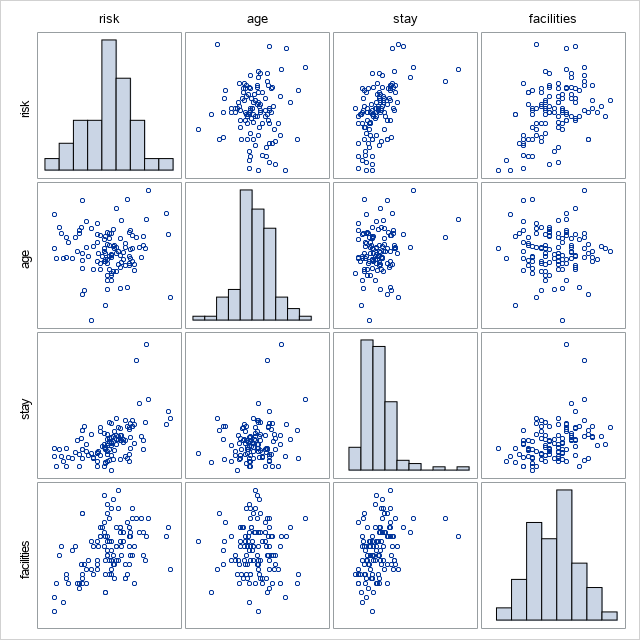

In [33]:
PROC SGSCATTER data=senic; 
 MATRIX risk age stay facilities /DIAGONAL = (HISTOGRAM); 
RUN;


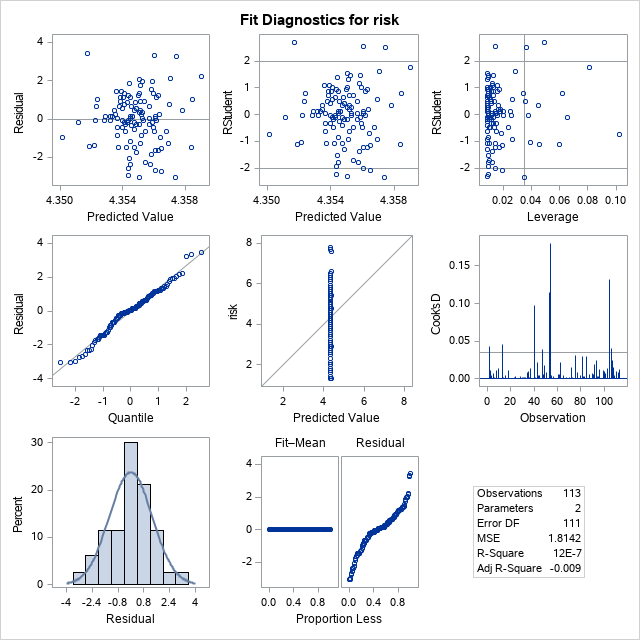
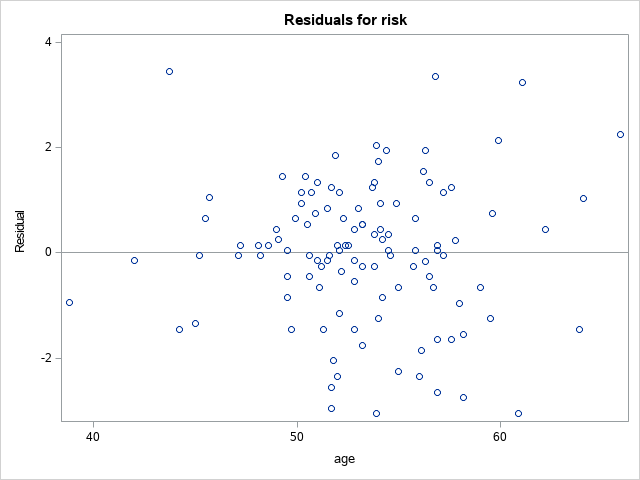
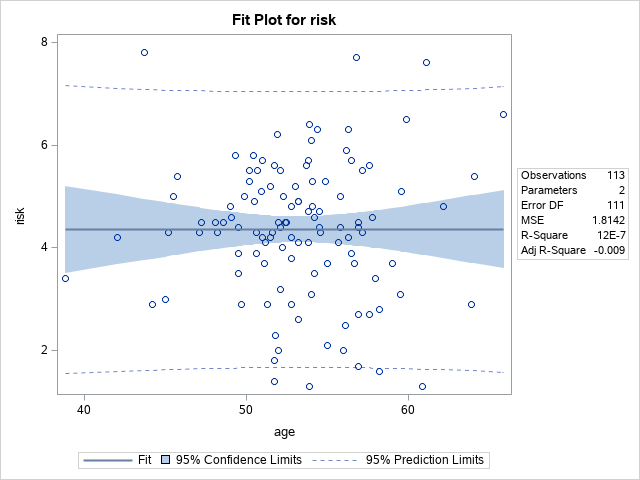
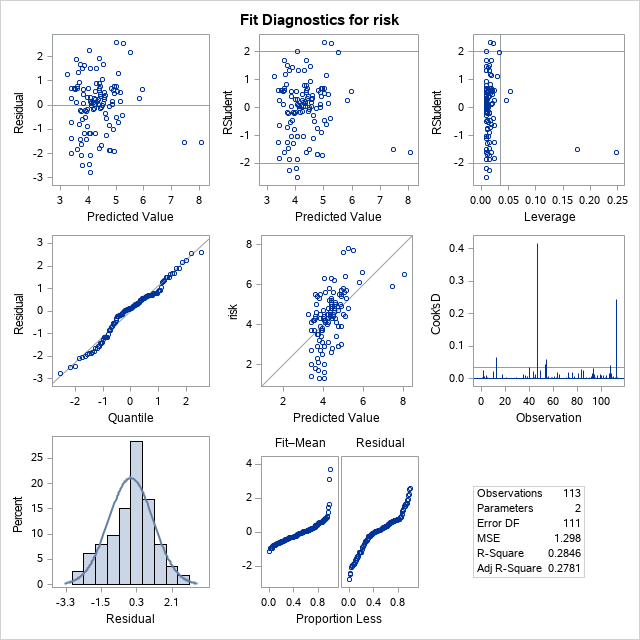
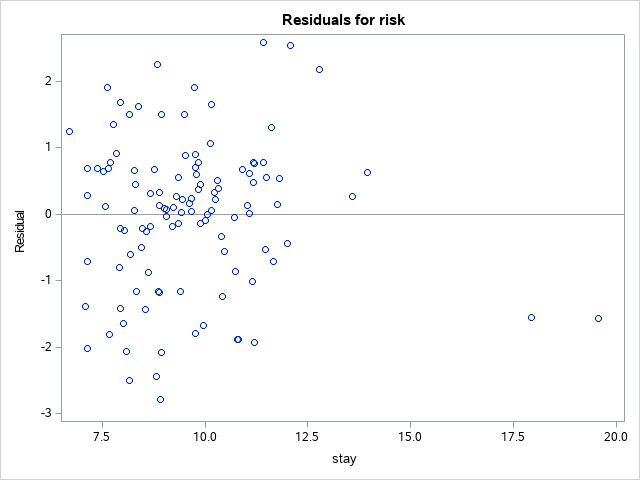
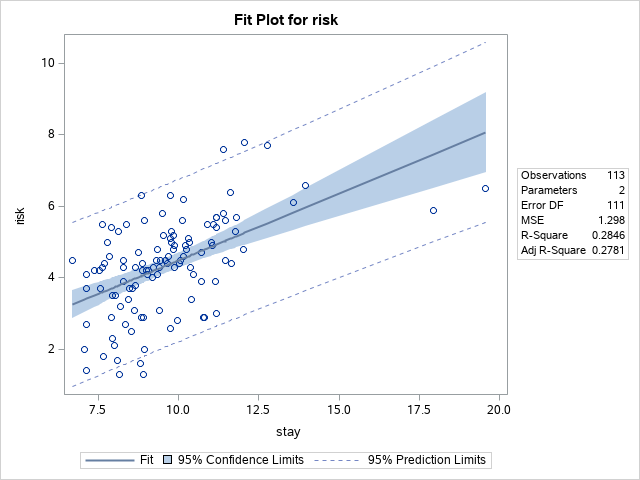
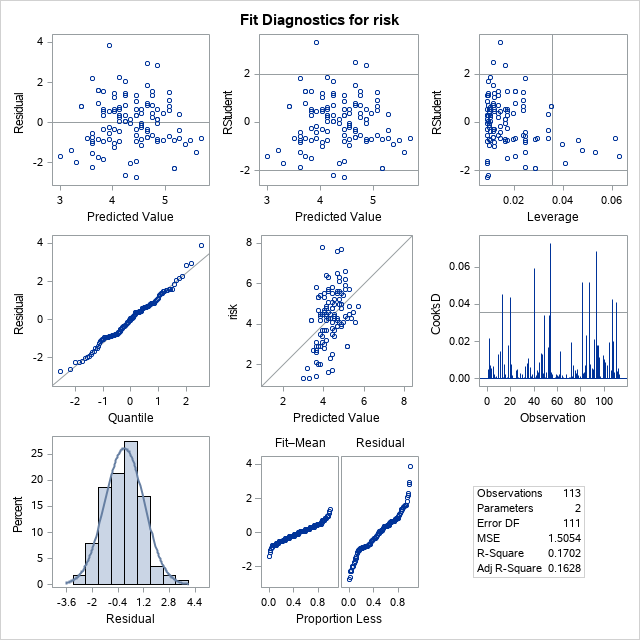
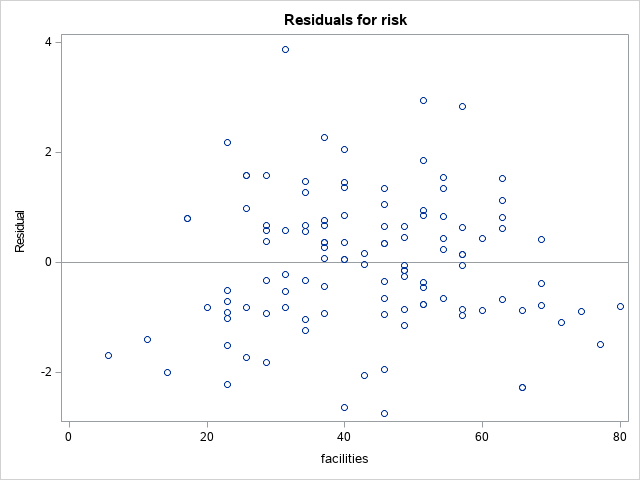
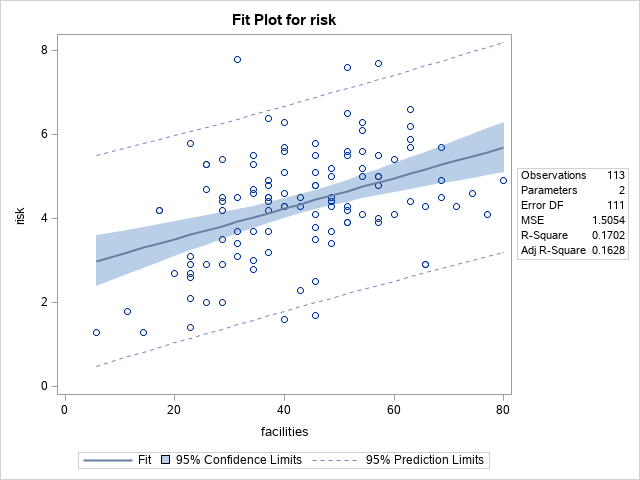

In [34]:
proc reg data=senic;
  model1: model risk=age;
  model2: model risk=stay;
  model3: model risk=facilities;
run;


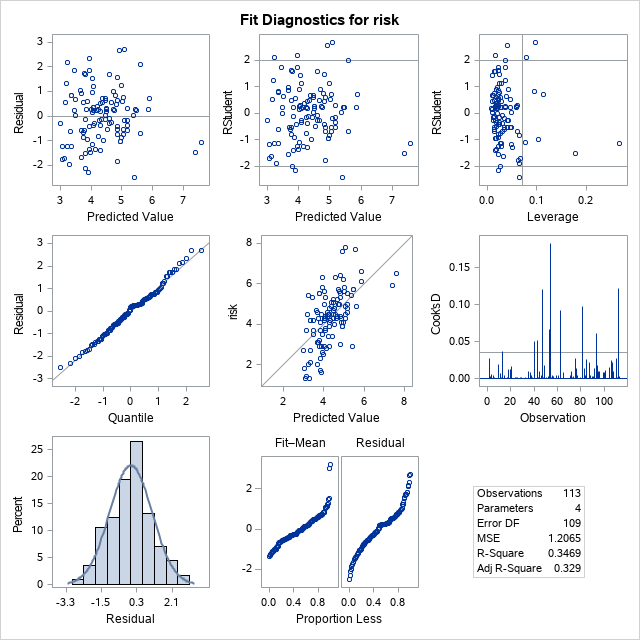
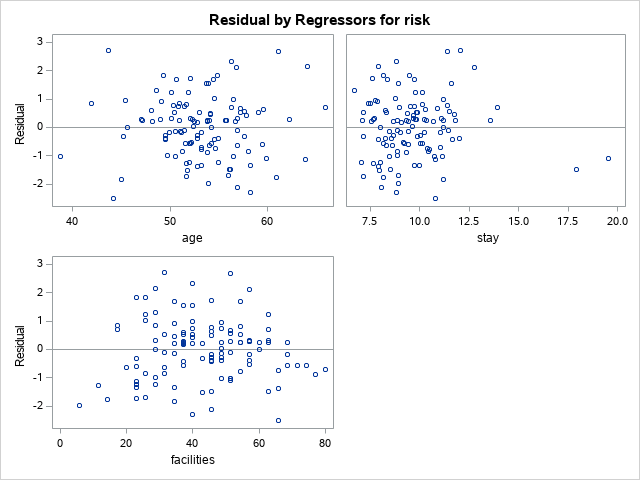

In [43]:
proc reg data=senic;
  fullmodel: model risk = age stay facilities;
  output out=senicfullfit residfull=r;
run;

In [44]:
data interactions;
    set senicfullfit;
    AgeStay= age*stay;
    AgeFac = age*facilities;
    StayFac = stay*facilities;
run;
